In [2]:
# Data load
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
covid_week_data = pd.read_excel('Folkhalsomyndigheten_Covid19.xlsx', sheet_name='Veckodata Riket')


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
vaxx_data = pd.read_excel('Folkhalsomyndigheten_Covid19_Vaccine.xlsx', sheet_name='Vaccinerade kommun och ålder')


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
daily_deaths = pd.read_excel('Folkhalsomyndigheten_Covid19.xlsx', sheet_name="Antal avlidna per dag") # Avlidna per dag
daily_deaths.drop(index=daily_deaths.index[-1],axis=0,inplace=True)


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
total_per_age_group = pd.read_excel('Folkhalsomyndigheten_Covid19.xlsx', sheet_name="Totalt antal per åldersgrupp") # Statistisk signifikant dödlighet
total_per_age_group.drop(index=total_per_age_group.index[-1],axis=0,inplace=True)
mortality = (total_per_age_group["Totalt_antal_avlidna"] / total_per_age_group["Totalt_antal_fall"]*100).round(decimals = 2)
total_per_age_group.insert(4, "Dödlighet",  mortality)


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
vaccinated_municipalities = pd.read_excel('Folkhalsomyndigheten_Covid19_Vaccine.xlsx', sheet_name="Vaccinerade kommun") #most/least 5




[1] Seaborn
[2] Plotly


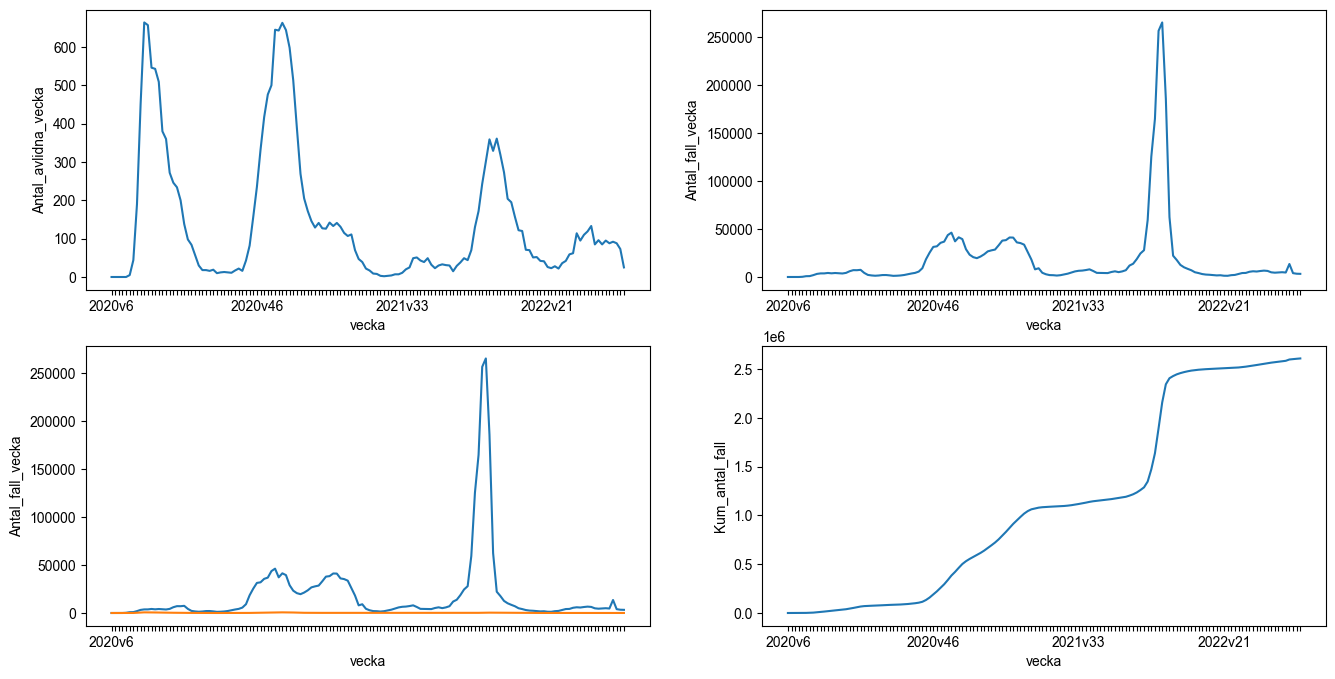

In [3]:
# Uppgift 1 backend

# a

#covid_week_data.info()   
#covid_week_data.describe()
#covid_week_data.value_counts()
#covid_week_data.head()
#covid_week_data.index
covid_week_data.columns


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# b

if not "vecka" in covid_week_data.columns:
    week = covid_week_data["år"].astype(str) + 'v' + covid_week_data["veckonummer"].astype(str)
    covid_week_data.insert(2, "vecka",  week)



# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# c-f

def sns_deaths_and_new_cases():

    fig, axes = plt.subplots(2,2, figsize=(16, 8))

    deaths = sns.lineplot(x="vecka", y="Antal_avlidna_vecka", data=covid_week_data, ax=axes[0,0])
    cases = sns.lineplot(data=covid_week_data, x="vecka", y="Antal_fall_vecka", ax=axes[0,1])
    deaths_and_cases = sns.lineplot(data=covid_week_data, x="vecka", y="Antal_fall_vecka", ax=axes[1,0])
    cases_and_deaths = sns.lineplot(data=covid_week_data, x="vecka", y="Antal_avlidna_vecka", ax=axes[1,0])
    cumulative_cases = sns.lineplot(data=covid_week_data, x="vecka", y="Kum_antal_fall", ax=axes[1,1])


    charts = [deaths, cases, deaths_and_cases, cases_and_deaths, cumulative_cases]

    for chart in charts:
        for ind, label in enumerate(chart.get_xticklabels()):
            if ind % 40 == 0:  # var 40e vecka
                label.set_visible(True)
            else:
                label.set_visible(False)

    sns.set()
    plt.show()


def plotly_deaths_and_new_cases():

    fig = make_subplots(rows=4, cols=1, shared_xaxes=True)

    # Antal fall per vecka
    fig.add_trace(
        go.Scatter(

            x=covid_week_data["vecka"], 
            y=covid_week_data["Antal_fall_vecka"],
            name="Antal fall per vecka",
            mode="lines"),

        row=1, col=1
    )

    # Antal avlidna per vecka
    fig.add_trace(go.Scatter(

        x=covid_week_data["vecka"], 
        y=covid_week_data["Antal_avlidna_vecka"],
        name="Antal avlidna per vecka",
        mode="lines"),

    row=2, col=1
    )

    # Antal fall & avlidna per vecka
    fig.add_trace(go.Scatter(

        x=covid_week_data["vecka"], 
        y=covid_week_data["Antal_fall_vecka"],
        name="Antal fall per vecka",
        mode="lines"),

    row=3, col=1

    )

    fig.add_trace(go.Scatter(

        x=covid_week_data["vecka"], 
        y=covid_week_data["Antal_avlidna_vecka"],
        name="Antal avlidna per vecka",
        mode="lines"),

    row=3, col=1
    )

    # Kum. antal fall
    fig.add_trace(go.Scatter(
        
        x=covid_week_data["vecka"], 
        y=covid_week_data["Kum_antal_fall"],
        name="Kum. antal fall",
        mode="lines"),

    row=4, col=1
    )


    fig.update_layout(height=800, width=1200, title_text="Nya, avlidna och kumulativa antal fall",
                                        legend=dict(orientation="h", title="", x=0.005, y=1.05), template='none')


    fig.show()



# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

print("[1] Seaborn")
print("[2] Plotly")
plot_choice = int(input("Vilket bibliotek vill du plotta i?"))

if plot_choice == 1:
    sns_deaths_and_new_cases()
if plot_choice == 2:
    plotly_deaths_and_new_cases()
        





In [4]:
# Uppgift 2.a
vaxx_data.fillna(0, inplace=True)


nr_of_counties = vaxx_data["Län_namn"].nunique()
print(f"Antal län: {nr_of_counties}")


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Uppgift 2.b
nr_of_municipalities = vaxx_data["Kommun_namn"].nunique()
print(f"Antal län: {nr_of_municipalities}")


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Uppgift 2.c
befolkning = vaxx_data["Befolkning"].sum()
print(f"Sverige befolkning: {befolkning:,} st.")


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Uppgift 2.d

total_pop = 10_521_556
#Källa: https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/sveriges-befolkning/


lowest_ages = ['12-15', '16-17']
lowest_ages_query = vaxx_data.query("Ålder.isin(@lowest_ages)")


ages_12_to_17 = lowest_ages_query["Befolkning"].sum()
dataset_population = vaxx_data["Befolkning"].sum()


under_12 = total_pop - dataset_population
under_18 = under_12 + ages_12_to_17
pct_of_total_population = under_18 / total_pop


print(f"Befolkning under 18: {under_18:,}")


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Uppgift 2.e

age_group = vaxx_data.groupby("Ålder")

ages_grouped = age_group["Befolkning"].sum()
ages_group_df = ages_grouped.reset_index()

total_population = ages_group_df["Befolkning"].sum()

fig = px.bar(ages_group_df, x="Ålder", y="Befolkning", title=f"Åldersfördelning bland Sveriges {total_population:,} invånare")
fig.show()


Antal län: 21
Antal län: 290
Sverige befolkning: 9,092,790 st.
Befolkning under 18: 2,174,136


In [5]:
# Uppgift 2.f


# minst 1 dos per county

county_group = vaxx_data.groupby("Län_namn")
pct_atleast_1 = county_group["Andel minst 1 dos"].mean()*100
pct_atleast_1_df = pct_atleast_1.reset_index()


# andel 2 doser per län

vaxx_data["Andel 2 doser"] = vaxx_data.apply(lambda x: x['Andel minst 2 doser'] - x["Andel 3 doser"], axis=1)
county = vaxx_data.groupby("Län_namn")
andel_2 = county["Andel 2 doser"].mean()*100
andel_2_df = andel_2.reset_index()


# andel 3 doser per län

county_group = vaxx_data.groupby("Län_namn")
pct_atleast_3 = county_group["Andel 3 doser"].mean()*100
pct_atleast_3_df = pct_atleast_3.reset_index()



fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

fig.add_trace(go.Bar(
    x=pct_atleast_1_df["Län_namn"], y=pct_atleast_1_df["Andel minst 1 dos"], 
    name="Minst 1 dos"), 

row=1, col=1)

fig.add_trace(go.Bar(
    x=andel_2_df["Län_namn"], y=andel_2_df["Andel 2 doser"], 
    name="Andel 2 doser"), 

row=2, col=1)

fig.add_trace(go.Bar(
    x=pct_atleast_3_df["Län_namn"], y=pct_atleast_3_df["Andel 3 doser"], 
    name="Andel 3 dos"), 

row=3, col=1)


fig.update_layout(height=800, width=1200, title_text="Andel doser", template='none')

fig.show()



In [6]:
# 2.f
county_group = vaxx_data[["Län_namn","Andel minst 1 dos", "Andel 2 doser", "Andel 3 doser", "Andel 4 doser"]].groupby("Län_namn")

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

counties = ["Västra Götalands län", "Stockholms län"]
counties_query = vaxx_data.query("Län_namn.isin(@counties)")
counties_df = counties_query[["Län_namn", "Andel minst 1 dos", "Andel 2 doser", "Andel 3 doser", "Andel 4 doser"]]
counties_group_mean = counties_df.groupby("Län_namn").mean()*100
county_df = counties_group_mean.reset_index()

county_df = pd.melt(county_df, id_vars="Län_namn", var_name="Doser", value_vars=['Andel minst 1 dos', 'Andel 2 doser', 'Andel 3 doser', 'Andel 4 doser'] )


fig = px.bar(county_df, x='Län_namn', y='value', color='Doser', barmode='group', labels=dict(value="Procent", Län_namn="Län"), template='none')
fig.show()


### Uppgift 3
#### KPI #1  Vaccinerade efter åldersgrupp
* Först ut undersöktes andel vaccinerade efter åldersgrupp  
* Den mest vaccinerade åldersgruppen var 80-89 åringar, följt av 90 plusare och 70-79 åringar. Skiljde som mest .12% enheter emellan dom.
* Minst vaccinerade vuxna åldersgrupp var 18-29 åringar, följt av 30-39 åringar. Det skiljde 1.03% som mest mellan grupperna. 
* På tredje plats kom 40-49 åringar, 5.89% procenenheter fler än 18-29 åringar.




In [7]:
# Andel vaccinerade efter åldersgrupp

all_ages_group = vaxx_data.groupby(["Ålder"], as_index=False)

ages_mean = all_ages_group["Andel minst 1 dos"].mean()
ages_mean["Andel minst 1 dos"] *= 100

fig = px.bar(ages_mean, x="Ålder", y="Andel minst 1 dos", template='plotly_dark')
fig.show()



### KPI#2 Skillnad i andel vaccinerade mellan och inom mest och minst vaccinerade kommuner
* Skillnader i andel vaccinerade jämförs. Dom 5 mest och 5 minst vaccinerade kommunerna.  

* Skillnaden mellan den mest vaccinerade kommunan och minst vaccinerade kommunen var 22.7 procenheter.  

* Största skillnaden inom dom 5 minst vaccinerade kommunerna var 6 procentenheter.  

* Största skillnaden inom dom 5 mest vaccinerade kommunerna var 1.2 procentenheter.  

* Tre av dom minst vaccinerade kommunerna befinner sig i Skåne. Dom två minst vaccinerade kommunerna befinner sig i Stockholmsområdet  

* Dom två minst vaccinerade kommunerna är också dom befolkningsmässigt största i urvalet


In [8]:
# 5 mest & minst vaccinerade kommuner

six_largest = vaccinated_municipalities.nlargest(5, ["Andel_dos1"])
six_largest = six_largest[["KnNamn", "Andel_dos1"]]
six_largest.insert(0, "Storlek", ["Mest" for n in range(len(six_largest))])

six_smallest = vaccinated_municipalities.nsmallest(5, ["Andel_dos1"])
six_smallest = six_smallest[["KnNamn", "Andel_dos1"]]
six_smallest.insert(0, "Storlek", ["Minst" for n in range(len(six_smallest))])

size_df = pd.concat([six_smallest, six_largest])
size_df["Andel_dos1"] *= 100


fig = px.bar(size_df, x='KnNamn', y='Andel_dos1', color='Storlek', barmode='group', labels=dict(Andel_dos1="Procent", KnNamn="Kommun", Storlek="Vaccinerade"), template='plotly', text="Andel_dos1")
fig.update_traces(texttemplate = "%{value:.1f}")
fig.update_xaxes(tickangle=-45)

fig.show()



### KPI#3 Ökad eller minskad dödlighet om dagen, per kvartal
* Här undersöks antal avlidna från första dödsfallet 11:e Mars 2020 till 25:e Oktober 2020. 

* Datum och kvartal för administration av vaccinationer 1-5 inkluderas.  

* Resultat visar dödsfall ökade från första peaken 8:e april 2020 till 28:e december 2020, innan vaccinationsdoser administrerades.  

* Efter vaccinationdoser 1-4 administrerades mellan Q4 2020 och Q1 2022 halverades dödsfallen nästan (46.3%).  



In [180]:
from datetime import datetime
from dateutil.relativedelta import relativedelta 


who_global_data = pd.read_csv('WHO-COVID-19-global-data.csv')

FHM_date = who_global_data.query("`Date_reported` >= '2020-03-11' and `Date_reported` <= '2022-10-26'")
daily_deaths_global = pd.pivot_table(FHM_date, index=["Date_reported"], values=["New_cases", "New_deaths"],aggfunc="sum")
daily_deaths_global = daily_deaths_global.reset_index()


deaths_per_quarter = {}
for year in [0,1,2]:
    counter = 1
    for month in ["01", "04", "07", "10" ]:
        start_date = f'202{year}-{month}-01'
        end_date = f'202{year}-{int(month)+3}-01' if month != "10" else f'202{year+1}-01-01'

        mask = (daily_deaths_global["Date_reported"] >= start_date) & (daily_deaths_global["Date_reported"] < end_date )
        quarter = daily_deaths_global[mask]
        deaths = quarter["New_deaths"].sum()
        deaths_per_quarter.update({f"Q{counter}_2{year}":deaths})
        counter += 1


fig = px.line(daily_deaths_global[["Date_reported", "New_deaths"]], x="Date_reported", y="New_deaths", template='plotly_dark', title="Avlidna om dagen per kvartal, globalt", labels=dict(New_deaths="Antal avlidna", Date_reported="Datum"))


fig.add_vrect(x0="2020-03-11", x1="2020-04-01", 
              annotation_text=f"{deaths_per_quarter['Q1_20']}", annotation_position="top right",
              fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2020-04-01", x1="2020-07-01", annotation_text=f"Q2:{deaths_per_quarter['Q2_20']} ", annotation_position="top right", fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2020-07-01", x1="2020-10-01", annotation_text=f"{deaths_per_quarter['Q3_20']}", annotation_position="top right", fillcolor="orange", opacity=0.25, line_width=0)
fig.add_vrect(x0="2020-10-01", x1="2021-01-01", annotation_text=f"{deaths_per_quarter['Q4_20']}", annotation_position="top right", fillcolor="brown", opacity=0.25, line_width=0)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig.add_vrect(x0="2021-01-01", x1="2021-04-01", annotation_text=f"{deaths_per_quarter['Q1_21']}", annotation_position="top right", fillcolor="grey", opacity=0.25, line_width=0)
fig.add_vrect(x0="2021-04-01", x1="2021-07-01", annotation_text=f"Q2: {deaths_per_quarter['Q2_21']}", annotation_position="top right", fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2021-07-01", x1="2021-10-01", annotation_text=f"{deaths_per_quarter['Q3_21']}", annotation_position="top right", fillcolor="orange", opacity=0.25, line_width=0)
fig.add_vrect(x0="2021-10-01", x1="2022-01-01", annotation_text=f"{deaths_per_quarter['Q4_21']}", annotation_position="top right", fillcolor="brown", opacity=0.25, line_width=0)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig.add_vrect(x0="2022-01-01", x1="2022-04-01", annotation_text=f"{deaths_per_quarter['Q1_22']}", annotation_position="top right", fillcolor="grey", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-04-01", x1="2022-07-01", annotation_text=f"Q2: {deaths_per_quarter['Q2_22']}", annotation_position="top right", fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-07-01", x1="2022-10-01", annotation_text=f"{deaths_per_quarter['Q3_22']}", annotation_position="top right", fillcolor="orange", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-10-01", x1="2022-10-26", annotation_text=f"{deaths_per_quarter['Q4_22']}", annotation_position="top right", fillcolor="brown", opacity=0.25, line_width=0)

fig.add_vline(x="2020-12-27", line_width=1, line_dash="dot")
fig.add_vline(x="2021-08-23", line_width=1, line_dash="dot")
fig.add_vline(x="2022-01-17", line_width=1, line_dash="dot")
fig.add_vline(x="2022-08-15", line_width=1, line_dash="dot")


fig.update_layout(height=600, width=1500)
fig.show()

#daily_deaths_global[["Date_reported", "New_deaths"]]

In [99]:
from datetime import datetime
from dateutil.relativedelta import relativedelta 

deaths_per_quarter = {}
for year in [0,1,2]:
    counter = 1
    for month in ["01", "04", "07", "10" ]:
        date = datetime.strptime(f'202{year}-{month}-01 00:00:00', '%Y-%m-%d %H:%M:%S')

        mask = (daily_deaths["Datum_avliden"] >= date) & (daily_deaths["Datum_avliden"] < date + relativedelta(months=3))
        quarter = daily_deaths[mask]
        deaths = quarter["Antal_avlidna"].sum()
        deaths_per_quarter.update({f"Q{counter}_2{year}":deaths})
        counter += 1


fig = px.line(daily_deaths, x="Datum_avliden", y="Antal_avlidna", title="Avlidna om dagen per kvartal", template='plotly_dark', labels=dict(Antal_avlidna="Antal avlidna", Datum_avliden="Datum"))

fig.add_vrect(x0="2020-03-11", x1="2020-04-01", 
              annotation_text=f"{deaths_per_quarter['Q1_20']}", annotation_position="top right",
              fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2020-04-01", x1="2020-07-01", annotation_text=f"Q2: {deaths_per_quarter['Q2_20']}", annotation_position="top right", fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2020-07-01", x1="2020-10-01", annotation_text=f"{deaths_per_quarter['Q3_20']}", annotation_position="top right", fillcolor="orange", opacity=0.25, line_width=0)
fig.add_vrect(x0="2020-10-01", x1="2021-01-01", annotation_text=f"{deaths_per_quarter['Q4_20']}", annotation_position="top right", fillcolor="brown", opacity=0.25, line_width=0)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig.add_vrect(x0="2021-01-01", x1="2021-04-01", annotation_text=f"{deaths_per_quarter['Q1_21']}", annotation_position="top right", fillcolor="grey", opacity=0.25, line_width=0)
fig.add_vrect(x0="2021-04-01", x1="2021-07-01", annotation_text=f"Q2: {deaths_per_quarter['Q2_21']}", annotation_position="top right", fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2021-07-01", x1="2021-10-01", annotation_text=f"{deaths_per_quarter['Q3_21']}", annotation_position="top right", fillcolor="orange", opacity=0.25, line_width=0)
fig.add_vrect(x0="2021-10-01", x1="2022-01-01", annotation_text=f"{deaths_per_quarter['Q4_21']}", annotation_position="top right", fillcolor="brown", opacity=0.25, line_width=0)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig.add_vrect(x0="2022-01-01", x1="2022-04-01", annotation_text=f"{deaths_per_quarter['Q1_22']}", annotation_position="top right", fillcolor="grey", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-04-01", x1="2022-07-01", annotation_text=f"Q2: {deaths_per_quarter['Q2_22']}", annotation_position="top right", fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-07-01", x1="2022-10-01", annotation_text=f"{deaths_per_quarter['Q3_22']}", annotation_position="top right", fillcolor="orange", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-10-01", x1="2022-10-26", annotation_text=f"{deaths_per_quarter['Q4_22']}", annotation_position="top right", fillcolor="brown", opacity=0.25, line_width=0)

fig.add_vline(x="2020-12-27", line_width=1, line_dash="dot")
fig.add_vline(x="2021-08-23", line_width=1, line_dash="dot")
fig.add_vline(x="2022-01-17", line_width=1, line_dash="dot")
fig.add_vline(x="2022-08-15", line_width=1, line_dash="dot")


fig.add_annotation(x="2020-12-27 00:00:00", y=99,
            text="Dos 1-2",
            showarrow=True,
            arrowhead=5,
            ax=30)

fig.add_annotation(x="2021-08-23 00:00:00", y=5, text="Dos 3", showarrow=True, arrowhead=5, ax=-20)
fig.add_annotation(x="2022-01-17 00:00:00", y=35, text="Dos 4", showarrow=True, arrowhead=5, ax=-20)
fig.add_annotation(x="2022-08-15 00:00:00", y=20, text="Dos 5", showarrow=True, arrowhead=5, ax=20)

fig.update_layout(height=600, width=1500)


fig.show()


    





### KPI #4: Statistisk signifikant dödlighet
* Jag undersökte totalt antal fall och avlidna efter åldersgrupp och statistisk signifikans.  

* Med statistisk signifkans menas en procenhet som försäkrar att utfallet inte beror på slump, 5% eller 1 av 20 fall.  

* Efter jag läst in arket eliminerade jag sista raden "Uppgift saknas" som ändå föll under 1%.  

* Jag skapade en ny kolumn kallad "dödlighet" vars värden är kvoten av antal avlidna / antalet fall.  

* Med .nlargest() sorterade jag dataframen efter högst värden på dödlighetkolumnen  

* Resultaten visar att statistisk signifikant dödlighet endast gäller för åldrar 70+  

* Åldrar 70-79: 5.34%, åldrar 80-89: 14.31% och åldrar 90+: 20.32%  

* Närmaste åldersgruppen 60-69 var <1%

In [10]:
# Dödlighet


three_highest_mortality = total_per_age_group.nlargest(3, ["Dödlighet"])
highest_mortality_cols = three_highest_mortality[["Åldersgrupp", "Totalt_antal_fall", "Totalt_antal_avlidna", "Dödlighet"]]
highest_mortality_cols

fig = go.Figure(data=[go.Bar(
    name = "Antal fall", x = highest_mortality_cols["Åldersgrupp"], y = highest_mortality_cols["Totalt_antal_fall"]),

                      go.Bar(
    name = "Antal avlidna",
    x = highest_mortality_cols["Åldersgrupp"],
    y = highest_mortality_cols["Totalt_antal_avlidna"],
    text=[f"{number:.2f}%" for number in highest_mortality_cols["Dödlighet"]],
  )], 
  
  layout={"barmode":"overlay"}
)


fig.update_layout(template='none',
                  font=dict(
                    family="Courier New, monospace",
                    size=18,  # Set the font size here
                    color="black"),
                    title="Åldersgrupper med statistisk signifikant dödlighet",
                      legend=dict(orientation="h", title="", x=0.02, y=1.1)
                    )
fig.update_xaxes(tickvals=np.arange(3), ticktext=["Ålder: 90+", "Ålder: 80-89", "Ålder: 70-79"])

fig.show()
 


### Uppgift 4

ladda ner dataset, split, apply & combine

